In [37]:
import pandas as pd 
from scipy import stats
import seaborn as sns
import numpy as np

In [14]:
df = pd.read_csv('genres_v2.csv', low_memory=False)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [7]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [8]:
df.describe(include=[object]) 

,type,id,uri,track_href,analysis_url,genre,song_name,title
count,42305,42305,42305,42305,42305,42305,21519,20780
unique,1,35877,35877,35877,35877,15,15439,132
top,audio_features,7D5qMGajdfznFcXFArk5VE,spotify:track:7D5qMGajdfznFcXFArk5VE,https://api.spotify.com/v1/tracks/7D5qMGajdfzn...,https://api.spotify.com/v1/audio-analysis/7D5q...,Underground Rap,Forever,Euphoric Hardstyle
freq,42305,9,9,9,9,5875,14,1398


In [9]:
df['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

# __Scalling__ 

## __Box Cox__ 

In [11]:
rc_log = stats.boxcox(df['duration_ms'], lmbda=0)
rc_bc, bc_params = stats.boxcox(df['duration_ms'])
bc_params

-0.007285239776428137

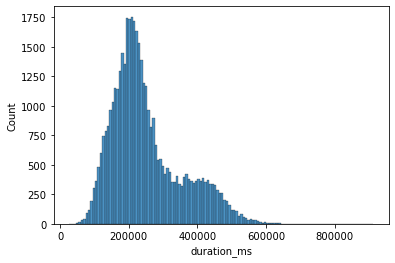

In [50]:
sns.histplot(df['duration_ms'], alpha=0.8)

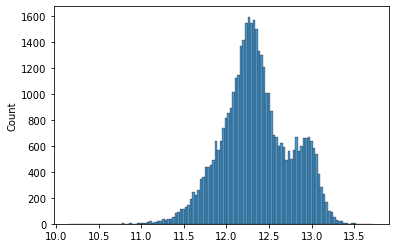

In [49]:
sns.histplot(rc_log, alpha=0.8)

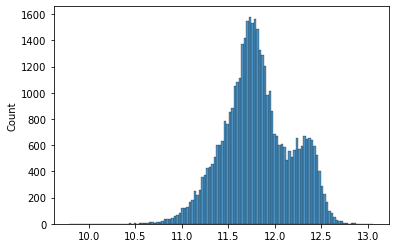

In [48]:
sns.histplot(rc_bc, alpha=0.8)

## __Log Transformation__ 

In [44]:
log = np.floor(np.log10(df['duration_ms']))

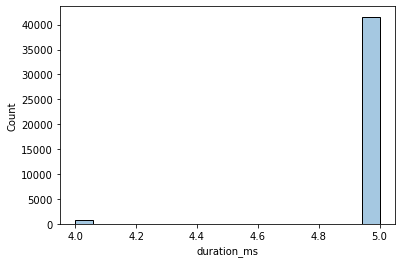

In [45]:
sns.histplot(log, alpha=0.4)

## __Quantile Binning__ 

In [46]:
deciles = df['duration_ms'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1    140508.2
0.2    168311.0
0.3    190038.6
0.4    207507.0
0.5    224760.0
0.6    245219.8
0.7    275235.8
0.8    336558.4
0.9    415649.2
Name: duration_ms, dtype: float64

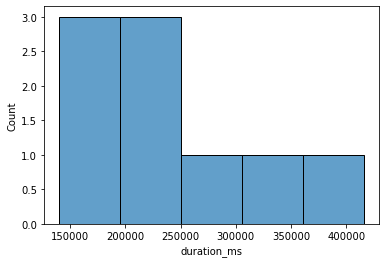

In [51]:
sns.histplot(deciles, alpha=0.7)

## __Fixed-Width Binning__ 

In [64]:
fixed_width = np.floor_divide(df['duration_ms'], 1000)
fixed_width

0        124
1        224
2         98
3        123
4        123
        ... 
42300    269
42301    210
42302    234
42303    323
42304    162
Name: duration_ms, Length: 42305, dtype: int64

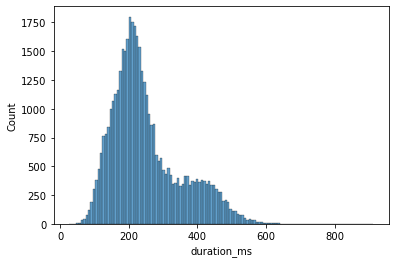

In [65]:
sns.histplot(fixed_width, alpha=0.7)

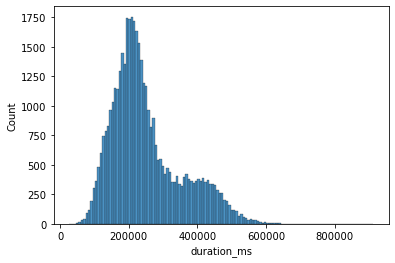

In [63]:
sns.histplot(df['duration_ms'], alpha=0.8)  # for comparison